In [30]:
import matplotlib.pyplot as plt
import mdtraj as md


# Load the trajectory and topology
#Z= 'ah8_30A'
#Z= '1_curved15_45A'
#Z= '2_scratch15_30A'
#Z= '3_bound15_15A'
#Z= '4_tandem_30A'
#Z= '5_tandem_15A'
Z= '6_tandem_CT2_30A'
#Z= '7_tandem_ex_CT2_30A'
N=4

traj_file = f'{Z}/N{N}/traj_continuous_v1_400_reduced.xtc'
top_file  = f'{Z}/N{N}/traj_continuous_v1_400_reduced.pdb'
#top_file  = f'{Z}/N{N}/traj_continuous_v1_400_reduced.gro'


traj = md.load(traj_file,top=top_file)
topology = traj.topology

print (traj[2000])

<mdtraj.Trajectory with 1 frames, 90763 atoms, 702 residues, and unitcells>


In [31]:
dssp = md.compute_dssp(traj[-2000:])

#print (dssp[0])
#len(dssp[0])

In [32]:
dssp_A = []
dssp_B = []
dssp_C = []
dssp_D = []

"""""
for dssp_frame in dssp:     # for 1_curved
    dssp_A.append(dssp_frame[0:34]) #bound
    dssp_B.append(dssp_frame[-34:]) #floating
    dssp_C.append(dssp_frame[8:26]) #AH bound
    dssp_D.append(dssp_frame[-26:-8]) # AH floating

for dssp_frame in dssp:     # for 2 and 3
    dssp_A.append(dssp_frame[34:68])
    dssp_B.append(dssp_frame[0:34])
    dssp_C.append(dssp_frame[42:60])
    dssp_D.append(dssp_frame[8:26])"""""

for dssp_frame in dssp:     # for 4_tandem
    dssp_A.append(dssp_frame[0:46])     # all peptide
    dssp_B.append(dssp_frame[0:18])     # domain A
    dssp_C.append(dssp_frame[28:46])    # domain B
    dssp_D.append(dssp_frame[19:28])    # linker
"""""
for dssp_frame in dssp:     # for 4_tandem_ext
    dssp_A.append(dssp_frame[0:62])     # all peptide
    dssp_B.append(dssp_frame[8:26])     # domain A
    dssp_C.append(dssp_frame[36:54])    # domain B
    dssp_D.append(dssp_frame[26:36])    # linker"""""





print (dssp_A[1000])
print (dssp_B[1000])
print (dssp_C[1000])
print (dssp_D[1000])

['C' 'C' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'H' 'H' 'H' 'H' 'H' 'H' 'C' 'C' 'C' 'H' 'H' 'H' 'H' 'H' 'C' 'C' 'C'
 'C' 'C' 'H' 'H' 'H' 'C' 'C' 'C' 'C' 'C']
['C' 'C' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'C' 'C' 'C' 'C' 'C' 'C' 'C']
['H' 'H' 'H' 'H' 'H' 'C' 'C' 'C' 'C' 'C' 'H' 'H' 'H' 'C' 'C' 'C' 'C' 'C']
['H' 'H' 'H' 'H' 'H' 'H' 'C' 'C' 'C']


In [33]:
percent_helix_A = []
percent_helix_B = []
percent_helix_C = []
percent_helix_D = []

for frame in dssp_A:
    percent_helix_A.append(100*float(frame.tolist().count('H'))/float(len(frame)))
for frame in dssp_B:
    percent_helix_B.append(100*float(frame.tolist().count('H'))/float(len(frame)))
for frame in dssp_C:
    percent_helix_C.append(100*float(frame.tolist().count('H'))/float(len(frame)))
for frame in dssp_D:
    percent_helix_D.append(100*float(frame.tolist().count('H'))/float(len(frame)))

print(percent_helix_A[1],len(percent_helix_A))
#print(percent_helix_C[1],len(percent_helix_C))

71.73913043478261 2000


200
200


<Figure size 600x300 with 0 Axes>

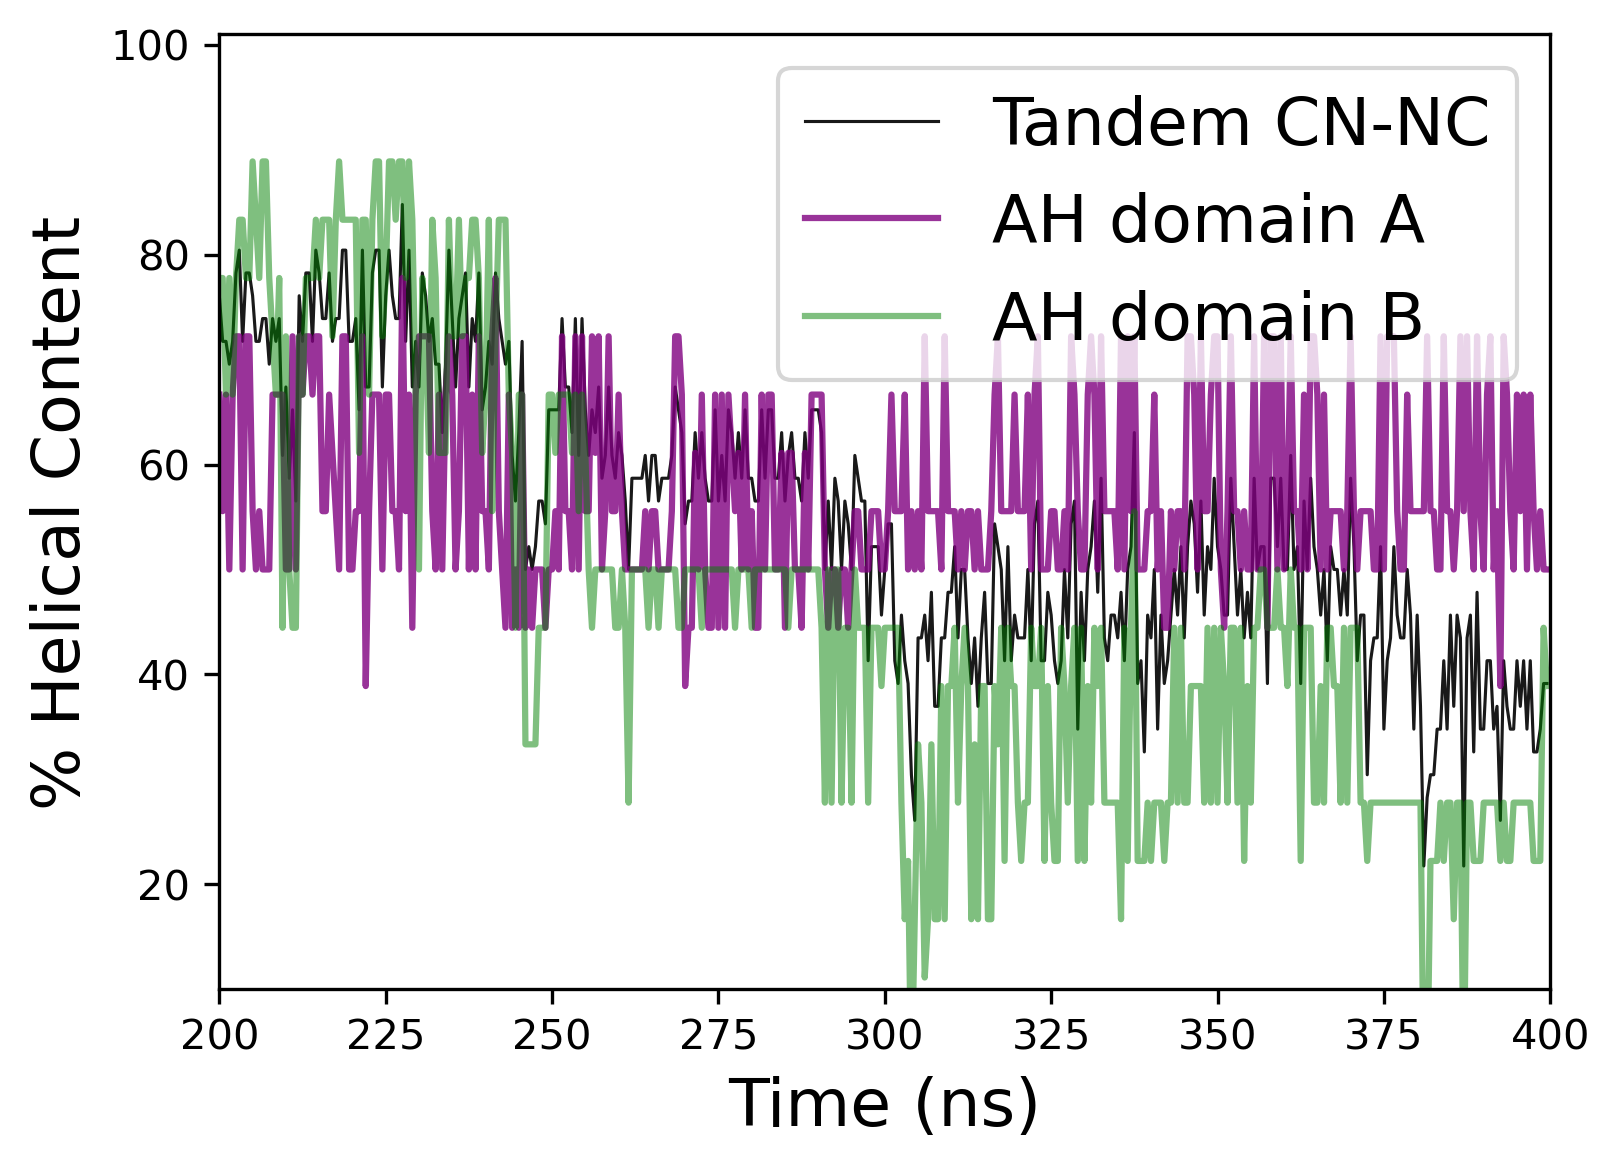

In [37]:
plt.figure(figsize=(6,3))
print(len(traj[2000:4000:10]))
print(len(percent_helix_A[::10]))

fig, ax = plt.subplots(figsize=(5.5,4),dpi=300)

"""
# sol/sur
plt.plot(traj[2000:4000:5].time/1000,percent_helix_C[::5],color='skyblue',label='AH domain, Bound');
plt.plot(traj[2000:4000:5].time/1000,percent_helix_D[::5],color='gold',label='AH domain, Floating');
plt.plot(traj[2000:4000:5].time/1000,percent_helix_A[::5],color='blue',label='Extended Peptide, Bound');
plt.plot(traj[2000:4000:5].time/1000,percent_helix_B[::5],color='orange',label='Extended Peptide, Floating');

# bound/bound
plt.plot(traj[2000:4000:5].time/1000,percent_helix_C[::5],color='skyblue',label='AH domain, Chain B');
plt.plot(traj[2000:4000:5].time/1000,percent_helix_D[::5],color='gold',label='AH domain, Chain A');
plt.plot(traj[2000:4000:5].time/1000,percent_helix_A[::5],color='blue',label='Extended, Chain B');
plt.plot(traj[2000:4000:5].time/1000,percent_helix_B[::5],color='orange',label='Extended, Chain A');

# NC tandem
plt.plot(traj[2000:4000:5].time/1000,percent_helix_A[::5], color='black',  alpha=0.9, label='Tandem NC-NC', linewidth =0.5 );
plt.plot(traj[2000:4000:5].time/1000,percent_helix_B[::5], color='green',  alpha=0.9, label='AH domain A'  );
plt.plot(traj[2000:4000:5].time/1000,percent_helix_C[::5], color='green',alpha=0.5, label='AH domain B');
#plt.plot(traj[2000:4000:5].time/1000,percent_helix_D[::5], color='skyblue',label='linker');
"""""
# CC tandem
plt.plot(traj[2000:4000:5].time/1000,percent_helix_A[::5], color='black',  alpha=0.9, label='Tandem CN-NC', linewidth =0.75 );
plt.plot(traj[2000:4000:5].time/1000,percent_helix_B[::5], color='purple',  alpha=0.8, label='AH domain A'  );
plt.plot(traj[2000:4000:5].time/1000,percent_helix_C[::5], color='green',alpha=0.5, label='AH domain B');
#plt.plot(traj[2000:4000:5].time/1000,percent_helix_D[::5], color='skyblue',label='linker');
"""""

# CC-ext tandem
plt.plot(traj[2000:4000:5].time/1000,percent_helix_A[::5], color='black',  alpha=0.9, label='Tandem Extended', linewidth =0.5 );
plt.plot(traj[2000:4000:5].time/1000,percent_helix_B[::5], color='purple',  alpha=0.8, label='AH domain A'  );
plt.plot(traj[2000:4000:5].time/1000,percent_helix_C[::5], color='green',alpha=0.5, label='AH domain B');
#plt.plot(traj[2000:4000:5].time/1000,percent_helix_D[::5], color='skyblue',label='linker');
"""""



#plt.title('Multiple Peptides',fontsize=12)
plt.ylim((10,101))
plt.xlim((200,400))
plt.ylabel('% Helical Content',fontsize=16);
plt.xlabel('Time (ns)',fontsize=16);
#plt.legend(loc='lower right', bbox_to_anchor=(1,0),fontsize=16);
plt.legend(loc="upper right",fontsize=16)

plt.tight_layout()
plt.savefig(f'alpha_helix_content_{Z}_N{N}.png',bbox_inches='tight')